# Проектная работа

# *Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+*

**Описание проекта**

От компании по разработке развлекательного приложения Procrastinate Pro+ поступило обращение по маркетинговому анализу бизнес-показателей: на протяжении последних месяцев, не смотря на вложения в рекламу, компания терпит убытки.

Работа будет проводиться с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

На момент исследования на календаре **1 ноября 2019 года**, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через **две недели** после привлечения. 

**Целью** исследования является анализ бизнес-показателей по поиску причин убытков.

**Результат исследования** даст возможность компании выйти в плюс.  

**В ходе** исследования мы
- рассчитаем такие бизнес-показатели, как «пожизненная ценность» клиента (LTV), окупаемость инвестиций (ROI),стоимость привлечения одного клиента (CAC), удержание (Retention Rate) и конверсия (CR),
- проведем анализ данных,
- выявим причины неэффективности привлечения пользователей,
- сформулируем рекомендации для отдела маркетинга.

Также нам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Этапы работы:**
1. [Загрузка данных и подготовка их к анализу](#title1) - выгрузим необходимые библиотеки данных по работе с данными, их визуализацией и изучим общую информацию в исходной таблице, проведем подготовку выгруженных данных, проверим их тип, наличие пропущенных значений, продублированных строк;
2. [Создание функции для расчёта и анализа LTV, ROI, удержания и конверсии.](#title2) - на основе уже обработанных данных используем функции для рассчета LTV, ROI, удержания и конверсии;
3. [Исследовательский анализ данных](#title3) - составим профили пользователей по странам, устройствам, каналам и источникам привлечения;
4. [Маркетинг](#title4) - подробнее изучим расходы на рекламу ;
5. [Оцените окупаемость рекламы](#title5) - используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. 
6. [Общие выводы](#title6) - рассмотрим результаты проведенного исследования, выделим причины неэффективности привлечения пользователей и сформулируем рекомендации для отдела маркетинга.

## Загрузка данных и подготовка их к анализу
<a id="title1"></a>

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Импортируем необходимые библиотеки для последующей работы с данными. 
Для визуального сопровождения анализа данных нам потребуются также библиотеки, ответственные за составление графиков и диаграмм

In [1]:
#Это у нас будут данные
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

#А это у нас будет визуал
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### *Работа с таблицей visits*

Загрузили данные из первого csv-файла c помощью библиотеки pandas.
Этот датасет хранит лог сервера с информацией о посещениях сайта.

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv') 
display(visits.head(5))

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Чтобы подробнее изучить количество строк и столбцов, а также пропуски и типы данных, воспользуемся методом info().

Эта таблица с информацией о посещениях сайта состоит из 309901 строк и 6 столбцов.

1. User Id — уникальный идентификатор пользователя,
2. Region — страна пользователя,
3. Device — тип устройства пользователя,
4. Channel — идентификатор источника перехода,
5. Session Start — дата и время начала сессии,
6. Session End — дата и время окончания сессии.

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


#### Тип данных таблицы visits

Мы видим, что страна пользователя, устройство и источник имеют строковый тип данных, идентификатор пользователя - целочисленный тип данных, а дата и время начала и окончания сессии (Session Start и Session End) имеют строковый тип данных. Приведем данные к формату datetime.

In [4]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])

####  Поропуски visits

По общей информации о таблице видно, что в ней нет пропусков. Также это можно проверить комбинацией методов .isna().sum().

In [5]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

####  Уникальные значения и дубликаты visits

Проверим таблицу visits на явные дубликаты комбинацией методов .duplicated().sum().

In [6]:
# Явных дубликатов нет
visits.duplicated().sum()

0

Теперь посмотрим на уникальные значения в столбцах со странами, источниками и устройствами.

In [7]:
# В таблице присутствуют 4 страны пользователей: США, Великобритания, Франция и Германия
print(visits['Region'].unique())

['United States' 'UK' 'France' 'Germany']


In [8]:
# В таблице присутствуют 4 типа устройств пользователей: Айфон, Мак, Андроид и ПК
print(visits['Device'].unique())

['iPhone' 'Mac' 'Android' 'PC']


In [9]:
# В таблице присутствуют 11 идентификаторов источников перехода
print(visits['Channel'].unique())

['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


### *Работа с таблицей orders*

Загрузили данные из второго csv-файла c помощью библиотеки pandas. Этот датасет содержит информацию о заказах.

In [10]:
orders = pd.read_csv('/datasets/orders_info_short.csv') 
display(orders.head(5))

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Чтобы подробнее изучить количество строк и столбцов, а также пропуски и типы данных, воспользуемся методом info().

Эта таблица состоит из 40212 строк и 3 столбцов.

1. User Id — уникальный идентификатор пользователя,
2. Event Dt — дата и время покупки,
3. Revenue — сумма заказа.

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


#### Тип данных таблицы orders

Мы видим, что идентификатор пользователя имеет целочисленный тип данных, сумма заказа - вещественный тип данных, а дата и время покупки (Event Dt) имеет строковый тип данных. Приведем данные к формату datetime.

In [12]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

####  Поропуски orders

По общей информации о таблице видно, что в ней нет пропусков. Также это можно проверить комбинацией методов .isna().sum().

In [13]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

####  Уникальные значения и дубликаты orders

Проверим таблицу orders на явные дубликаты комбинацией методов .duplicated().sum().

In [14]:
# Явных дубликатов нет
orders.duplicated().sum()

0

### *Работа с таблицей costs*

Загрузили данные из третьего csv-файла c помощью библиотеки pandas. Этот датасет содержит информацию о расходах на рекламу.

In [15]:
costs = pd.read_csv('/datasets/costs_info_short.csv') 
display(costs.head(5))

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Чтобы подробнее изучить количество строк и столбцов, а также пропуски и типы данных, воспользуемся методом info().

Эта таблица состоит из 1800 строк и 3 столбцов.

1. dt — дата проведения рекламной кампании,
2. Channel — идентификатор рекламного источника,
3. costs — расходы на эту кампанию.

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Тип данных таблицы costs

Мы видим, что идентификатор рекламного источника имеет строковый тип данных, расходы на рекламную компанию - вещественный тип данных, а дата проведения рекламной кампании(dt) имеет строковый тип данных. Чтобы далее при рассчетах иметь возможность работы с датами, а не со строками в этом столбце применим к нему метод to_datetime с атрибутом dt.

In [17]:
costs['dt'] = pd.to_datetime(costs['dt'],format="%Y-%m-%d")

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


####  Поропуски costs

По общей информации о таблице видно, что в ней нет пропусков. Также это можно проверить комбинацией методов .isna().sum().

In [19]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

####  Уникальные значения и дубликаты costs

Проверим таблицу costs на явные дубликаты комбинацией методов .duplicated().sum().

In [20]:
# Явных дубликатов нет
costs.duplicated().sum()

0

Теперь посмотрим на уникальные значения в столбце с идентификаторами рекламного источника.

In [21]:
# В таблице присутствуют 10 идентификаторов источников перехода, 
# поскольку «органические» пользователели перешли на сайт самостоятельно, а не благодаря рекламе
display(costs['Channel'].unique())

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Дополнительно переименуем названия столбцов в каждой таблице, потому что они написаны с заглавными буквами и пробелами, к ним неудобно обращаться. Перепишим их в нижнем регистре и через символ нижнего подчеркивания "_".

In [22]:
# на этом моменте терпение с копированием или написанием названий столбцов из двух слов у меня закончилось и вообще
# такие названия трудночитаемы

orders = orders.rename(columns={'User Id':'user_id', 'Event Dt' : 'event_dt', 'Revenue' : 'revenue'})

visits = visits.rename(columns={'User Id':'user_id', 'Region' : 'region', 
                                 'Device' : 'device', 'Channel' : 'channel', 
                                 'Session Start' : 'session_start', 'Session End' : 'session_end'})

costs = costs.rename(columns={'Channel': 'channel'})


    
* Проблема названий столбцов ведь только в том, что имеются пробелы и заглавные буквы, соответственно можно было бы обойтись и без `rename`
* Могу предложить такой вариант `visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]`
    


In [23]:
orders.info()
visits.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2

**Таким образом, мы подготовили данные из исходных файлов для дальнейшей работы. Для этого данные csv-файлов:**
- проверили на соответствие типов данных (столбцы со временем и датой перевели методом to_datetime из формата object в datetime);
- изучили наличие пропусков методами .info() и .isna().sum();
- выявили отстутсвие неявных дубликатов в каждом файле методом costs.duplicated().sum() и проверили уникальные значения в некоторых столбцах методом .unique().
- переименовали столбцы и привели их к единому варианту написания через змеиный регистр с помощью метода .rename().

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.
<a id="title2"></a>
Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### **Cоздание профилей пользователей - get_profiles()**

Профиль пользователя — таблица с деталями первого посещения каждого пользователя, такими как источник перехода на сайт, страна, устройство. Эти данные содержатся в нашей таблице visits.

Для создания профиля пользователя нам необходимо определить дату и время первого посещения сайта для каждого уникального пользователя.

Создадим структуру функции get_profiles(): 

- определяем новую переменную, в которую поместим отсортированные сессии по ID пользователя и дате посещения и сгруппируем по ID и найдем первые значения session_start, channel, device и region. Столбец с временем первого посещения переименуем из session_start в first_ts;
- затем для выделения кагорт определяем дату первого посещения и его первый день месяца;
- пользователей, которые перешли по рекламному баннеру и оформили подписку на приложение в будущем мы будем рассматривать отдельно от тех, кто сам нашел сайт и от тех, кто вообще ничего не покупал. Сразу создаем столбец payer, в котором мы зададим значение, совершал ли пользователь факт покупки или нет (булев тип данных - False/True).
- сгруппируем пользователей по дате первого посещения и источнику перехода и посчитаем их в переменной new_users;
- создаем новый датафрейм ad_costs, куда помещаем число затрат на рекламу и данные о новых пользователях;
- создаем новый столбец ['acquisition_cost'] в ad_costs. С помощью деления стоимости на количество уникальных пользователей мы узнаем стоимость привлечения пользователей. Это нам также в дальнейшем понадобится.
- добавляем найденную стоимость привлечения в таблицу с профилями пользователей.
- а теперь в столбце со стоимостью привлечения заменяем стоимость пользователей, перешедших на сайт приложения без помощи рекламы на 0.

In [24]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index())

    # определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index())

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left')

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

profiles = get_profiles(visits, orders, costs)


### **Cоздание функции для подсчёта коэффициента удержания (Retention Rate) - get_retention()**

Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулись, то есть воспользовались продуктом или услугой, в последующие периоды.

Чтобы рассчитать Retention Rate, количество активных пользователей на текущий день делят на количество активных пользователей на первый день.

В предыдущем пункте мы создали профили пользователей с помощью функции get_profiles(). В таблице profiles мы поместили столбец session_start, который переименовали в first_ts и применили метод first(). Таким образом в таблице profiles мы имеем только дату и время первого посещения пользователей, а для расчёта Retention Rate нужны данные всех посещений из таблицы visits.

Для рассчета Retention Rate нам понадобятся момент анализа данных и горизонт анализа данных.

*Момент анализа данных* — это момент времени, в который мы работаем с данными. По вводным данным задания он у нас 1 ноября 2019 года.

*Горизонт анализа данных* — максимальный лайфтайм, который мы будем включить в анализ. У нас он представляет собой две недели после привлечения пользователя.

Создаем структуру функции:

- Задаем момент и горизонт анализа.
- Определим, что игнорировать горизонт мы не будем.
- Рассчитаем максимально возможную дату привлечения пользователей.
- Исключим из анализа пользователей, пришедших после этой даты.
- Исключим из результата все лайфтаймы, превышающие горизонт анализа.
- Объединяем данные visits с profiles.
- Рассчитываем лайфтайм пользователя для каждой сессии.
- Строим сводную таблицу result_grouped методом pivot_table(). , в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — количество уникальных идентификаторов пользователей.
- Сгруппируем данные по дате первого посещения из dt и посчитаем количество уникальных пользователей в каждой когорте, применив функцию nunique к столбцу user_id. Столбец с результатами переименуем в соответствии с содержанием в cohort_size — размер когорты.
- Объединим таблицу размеров когорт с таблицей удержания по столбцу dt методом merge(). Отсутствующие значения NaN заменим на 0 методом fillna().
- Рассчитаем коэффициенты удержания, разделив каждую «ячейку» таблицы удержания на соответствующий размер когорты.  Функция div() с axis=0 разделит все столбцы на столбец cohort_size. Результат — доля пользователей, «доживших» до каждого лайфтайма.

In [25]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


### **Cоздание функции для подсчёта конверсии (CR) - get_conversion()**

Конверсия — это доля людей, перешедших из одного состояния в другое. Например, в нашем случае это доля посетителей, перешедших на сайт и ставших покупателями. 

Для рассчета CR нам также понадобятся момент анализа данных и горизонт анализа данных.

Создадим структуру функции get_conversion():

- Исключим из результата все лайфтаймы, превышающие горизонт анализа.
- Объединяем данные orders с profiles.
- Рассчитываем лайфтайм пользователя для каждой сессии.
- Находим дату и время первой покупки для каждого пользователя.
- Поместим дату первой покупки в найденный на предыдущем этапе result_raw.
- Рассчитаем лайфтайм пользователей для каждой покупки.
- Построим сводную таблицу, в которой укажем названия строк — это будут даты первого посещения пользователей, названия столбцов - лайфтайм, а значения в «ячейках» — количество уникальных идентификаторов пользователей.
- Посчитаем сумму с накоплением для каждой строки таблицы конверсии.
- Вычислим размеры когорт и занесем результаты в отдельную таблицу.
- Объединим таблицы размеров когорт и конверсии.
- Разделим каждую «ячейку» таблицы конверсии на соответствующий размер когорты

In [26]:
# функция для расчёта конверсии

def get_conversion(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False,):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index())

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left')

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        
        result = result.fillna(0).cumsum(axis = 1)
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        result['cohort_size'] = cohort_sizes
        
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)

### **Cоздание функции  для подсчёта LTV (Lifetime Value) - get_ltv()**

LTV - это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. 

Чтобы рассчитать LTV выручку с накоплением за текущий день делят на размер когорты, то есть количество активных пользователей на первый день.

Создадим структуру функции get_ltv():

- Исключим из результата все лайфтаймы, превышающие горизонт анализа.
- Объединяем данные orders с profiles.
- Рассчитываем лайфтайм пользователя для каждой сессии.


Построить таблицу выручки. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — выручка.
Посчитать сумму с накоплением для каждой строки таблицы выручки.
Вычислить размеры когорт и занести результаты в отдельную таблицу.
Объединить таблицы размеров когорт и выручки.
Посчитать LTV: разделить каждую «ячейку» таблицы выручки на соответствующий размер когорты.

In [27]:
# функция для расчёта LTV и ROI

def get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )
ltv_raw, ltv, ltv_history, roi, roi_history  = get_ltv(
    profiles, orders, observation_date, horizon_days)

### **Cоздание функции для сглаживания данных - filter_data()**

Для уменьшения шумов на графике и его сглаживания применяют метод скользящего среднего. Этого можно достичь, выделив общую тенденцию изменения величины. Чем шире окно сглаживания, тем меньше шума. Сглаживание также называют фильтрацией.
В дальнейшем функцию filter_data() мы будем применять при вычислении значений метрик.

In [28]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### **Cоздание функции для построения графика Retention Rate - plot_retention()**

Чтобы построить кривую удержания в Python, применяют метод plot(). Он строит график, на котором линии отражают значения каждого столбца датафрейма.

График можно сгладить функцией filter_data().

In [29]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']]
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon))

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon))
    
    plt.tight_layout()
    plt.show()

### **Cоздание функции  для построения графика конверсии - plot_conversion()**

Чтобы построить график конверсии  в Python также применяется метод plot(). Он строит график, на котором линии отражают значения каждого столбца датафрейма. Результатом вызова функции plot_conversion() будут два графика: кривые и динамика.

График можно сгладить функцией filter_data().

In [30]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### **Cоздание функции  для визуализации LTV и ROI - plot_ltv_roi()**

Функция для визуализации пожизненной ценности и окупаемости — plot_ltv_roi() включает больше метрик, чем предыдущие.

Результатом вызова функции станут:
1. кривые LTV,
2. кривые ROI,
3. график истории изменений LTV,
4. график истории изменений ROI,
5. график истории изменений CAC.

Графики историй изменений можно сгладить функцией filter_data().

In [31]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Теоретическое обоснование нашей работы готово, теперь мы можем приступить к анализу подготовленных данных.

## Исследовательский анализ данных
<a id="title3"></a>

### Создание профилей  пользователей. Минимальная и максимальная даты привлечения пользователей.

Воспользуемся подготовленной ранее функцией для создания профилей пользователей.

In [32]:
profiles = get_profiles(visits, orders, costs)

display(profiles)

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

               dt      month  payer  acquisition_cost  
0      2019-05-07 2019-05-01   True          1.088172  
1      2019-07-09 2019-07-01  False          1.107237  
2      2019-10-01 2019-10-01  False          0.000000  
3      2019-08-22 2019-08-01  False          0.988235  
4      2019-10-02 2019-10-01  False          0.230769  
...           ...        ...    ...               ...  
150003 2019-09-28 2019-09-01  False          3.500000  
150004 2019-10-21 2019-10-01  False          0.000000  
150005 2019-07-23 2019-07-01  False          2.600000  
150006 2019-09-28 2019-09-01  False          0.205714  
150007 2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

Узнаем минимальную и максимальную даты привлечения пользователей. 

In [33]:
# Минимальная дата привлечения пользователей - 01.05.2019
min_analysis_date = profiles['dt'].min()
min_analysis_date

Timestamp('2019-05-01 00:00:00')

In [34]:
# Максимальная дата привлечения пользователей из датафрейма - 27.10.2019
max_analysis_date = profiles['dt'].max() 
max_analysis_date

Timestamp('2019-10-27 00:00:00')

Момент анализа ограничивает возможный горизонт анализа данных. Наш момент анализа (observation_date) = 1.11.2019. Но дата последнего привлечения пользователей - 27.10.2019. Сделаем ее нашим моментом анализа.

In [35]:
observation_date = profiles['dt'].max()
observation_date

Timestamp('2019-10-27 00:00:00')

Нам нужно проанализировать окупаемость пользователей не позднее чем через две недели после привлечения. Мы сможем включить в анализ только тех пользователей, которые успели «накопить» 14 дней лайфтайма (горизонт анализа). 

Соответственно, пользователей, которые к 27.10.2019 должны успеть накопить 14 дней лайфтайма мы сможем найти по формуле: момент анализа данных - горизонт анализа данных.

In [36]:
# Максимальная дата привлечения - 14.10.2019
last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
last_suitable_acquisition_date

Timestamp('2019-10-14 00:00:00')

Далее в функциях мы применим эти данные, когда будем исключить пользователей, не успевших «прожить» достаточно дней методом query().

***Таким образом***, в результате этого шага мы собрали профили пользователей:

1) Результатом применения заданной функции стало создание датафрейма из 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить интернет-магазин, страна пользователя и тип устройства, факт покупки и стоимость привлечения клиента.

2) Также с помощью методов max(), min() и timedelta() мы узнали минимальную и максимальные даты привлечения пользователей: 01.05.2019 и 14.10.2019 соответственно.

### Cтраны, из которых пользователи приходят в приложение.  Страна с наибольшим числом платящих пользователей. Таблица, отражающая количество пользователей и долю платящих из каждой страны.

Посмотрим, как будут распределены все пользователи по странам. Подробнее посмотрим на процентное соотношение пользователей по странам: пользователей из США более 66%, а наименьшее число клиентов - из Германии (10%). Соотношение пользователей из UK и Германии практически равно (11.7% и 11.6%).

In [37]:
top_region = profiles.groupby('region').agg({'user_id': 'count'})
top_region.sort_values(by='user_id', ascending = False).style.background_gradient('PuBuGn')

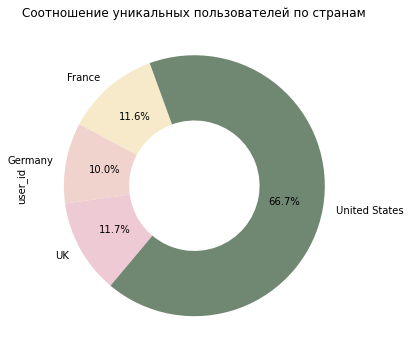

In [38]:
colors = ["#F6EACB", "#F1D3CE", "#EECAD5", "#708871"]
top_region.plot(kind='pie', figsize=(6, 6), legend = False, pctdistance=0.70, 
                wedgeprops=dict(width=0.5), startangle=110,
                autopct='%1.1f%%', colors = colors, subplots=True)
plt.title('Соотношение уникальных пользователей по странам')
plt.show()

Построим таблицу, отражающую количество платящих и неплатящих пользователей и каждой страны. Сначала создадим сводную таблицу, в которой по странам разделим пользователей по факту платежа.

In [39]:
# Собираем сводную таблицу по платящим и неплатящим пользователям
region_payer = (profiles.pivot_table(index='region', columns='payer',
                                     values='user_id', aggfunc='count'))

region_payer = region_payer.rename(columns={False: 'not_payer', True: 'payer'}).sort_values(by='payer')
region_payer

payer          not_payer  payer
region                         
Germany            14365    616
France             16787    663
UK                 16875    700
United States      93100   6902

Мы видим, в каждой стране количество неплатящих пользователей превышает платящих в несколько раз.

Чтобы подробнее рассмотреть соотношение пользователей по факту оплаты построим интерактивный столбчатый график с накоплением.

In [40]:
pay = profiles.groupby(by=['region', 'payer'], as_index=False).agg(count=('user_id', 'count')).sort_values('count', ascending=False)
fig = px.bar(pay, x='region', y='count', color='payer',  height=500,
            color_discrete_map={'False': 'royalblue', 'True': 'darkblue'})
fig.update_layout(
    title_text='Соотношение платящих и неплатящих пользователей по странам',
    title_font_size=20,
    xaxis_title='Страны',
    yaxis_title='Количество пользователей')
fig.show()

Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны. 

In [41]:
# Рассчитываем процент платящих пользователей путем деления количества платильщиков на общую сумму пользователей
# А еще округляем, чтобы в табличке не было значений со 100500 символов после запятой
region_payer_2 = region_payer
region_payer_2['all'] = region_payer_2['not_payer'] + region_payer_2['payer']

region_payer_2['payer_percent'] = (region_payer_2['payer'] / 
                                ((region_payer_2['not_payer'] + region_payer_2['payer']))* 100).round(1)

region_payer_2 = region_payer_2.drop(columns=['not_payer'])
region_payer_2 = region_payer_2.drop(columns=['payer'])

region_payer_2.sort_values(by='payer_percent', ascending = False)

payer             all  payer_percent
region                              
United States  100002            6.9
Germany         14981            4.1
UK              17575            4.0
France          17450            3.8

Доля платящих пользователей менее 10% в каждой из стран.

***Таким образом***, в результате этого шага мы узнали, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей:

1) Больше всего пользователей приложения приходится на США.

2) Распределение платящих пользователей по странам следующеее: 3.8% - Франция, 4.0% - Великобритания и 4.1% - Германия. США также является лидером по доле платящих пользователей (6.9%). 

3) Интересен также тот факт, что пользователей и Германии в нашем датафрейме меньше всего - 14981 человек, но при этом доля платящих пользователей из нее больше, чем во Франции и Великобритании.

### Устройства, которыми пользуются клиенты.  Предпочитаютаемые платящими пользователями иустройства. Таблица, отражающая количество пользователей и долю платящих для каждого устройства.

А как обстоят дела с типами устройств пользователей? Сгруппируем пользователей по устройствам. Пользователей iPhone подавляяющее большинство - 54479 человек, а вот системой Mac пользуется самое меньшее число пользователей из нашего датафрейма (30042 человек).

In [42]:
top_device = profiles.groupby('device').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending = False)
top_device.style.background_gradient('PuBuGn')

Строим барплот. Подавляющее большинство пользователей пользуются мобильными платформами. Пользователей одних только iPhone более 50 тыс человек. Десктопными версиями устройств MAC и PC пользуются около 60 тыс пользователей в сумме.

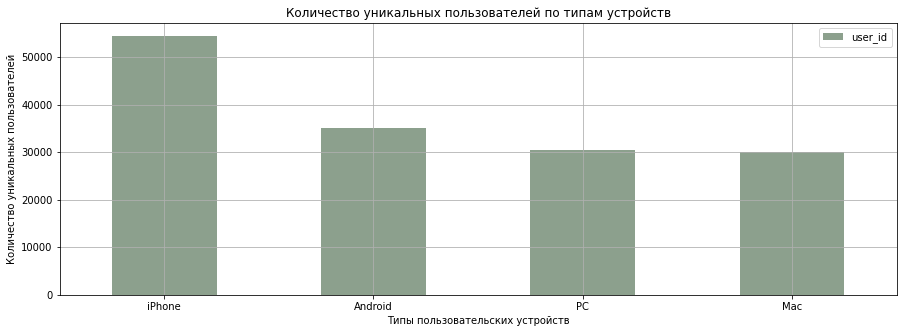

In [43]:
top_device.plot(kind = 'bar', 
                 figsize=(15, 5), 
                 color = "#708871", 
                 alpha = 0.8, 
                 grid = True, 
                label='Средний рейтинг')
plt.xticks(rotation=0)
plt.title('Количество уникальных пользователей по типам устройств')
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Типы пользовательских устройств')
plt.show()

Как итог, можно предположить, что приложение Procrastinate Pro+ пользуется большим спросом среди владельцев мобильных устройств. 

Количество владельцев iPhone также коррелирует с количеством пользователей из США (поскольку у нас их более 60% от общего числа).

Построим таблицу, отражающую количество платящих и неплатящих пользователей и их типы устройств. Сначала создадим сводную таблицу, в которой по устройствам разделим пользователей по факту платежа.

In [44]:
device_payer = (profiles.pivot_table(index='device', columns='payer',
                                     values='user_id', aggfunc='count'))

device_payer = device_payer.rename(columns={False: 'not_payer', True: 'payer'}).sort_values(by='payer')
device_payer

payer    not_payer  payer
device                   
PC           28918   1537
Mac          28130   1912
Android      32982   2050
iPhone       51097   3382

Чтобы подробнее рассмотреть соотношение пользователей по факту оплаты построим интерактивный столбчатый график с накоплением.

In [45]:
pay_2 = profiles.groupby(by=['device', 'payer'], as_index=False).agg(count=('user_id', 'count')).sort_values('count', ascending=False)
fig = px.bar(pay_2, x='device', y='count', color='payer',  height=500,
            color_discrete_map={'False': 'royalblue', 'True': 'darkblue'})
fig.update_layout(
    title_text='Соотношение платящих и неплатящих пользователей по типу устройств',
    title_font_size=20,
    xaxis_title='Типы устройств',
    yaxis_title='Количество пользователей')
fig.show()

Мы видим, что среди владельцев разных типов устройств количество неплатящих пользователей превышает платящих в несколько раз.

Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства. 

In [46]:
device_payer_2 = device_payer
device_payer_2['all'] = device_payer_2['not_payer'] + device_payer_2['payer']

device_payer_2['payer_percent'] = (device_payer_2['payer'] / 
                                ((device_payer_2['not_payer'] + device_payer_2['payer']))* 100).round(1)

device_payer_2 = device_payer_2.drop(columns=['not_payer'])
device_payer_2 = device_payer_2.drop(columns=['payer'])

device_payer_2.sort_values(by='payer_percent', ascending = False)

payer      all  payer_percent
device                       
Mac      30042            6.4
iPhone   54479            6.2
Android  35032            5.9
PC       30455            5.0

Владельцы системы iOS чаще платят за приложения. 

***Таким образом***, в результате этого шага мы узнали, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи:

1) Больше всего пользователей приложения приходится владельцев iPhone.

2) Распределение платящих пользователей по типам устройств следующеее: владельцы Mac являются лидерами по доле платящих пользователей (6.4%), затем следуют владельцы iPhone (6.2%). 

3) Видим интересное соотношение: доля платящих владельцев Mac больше доли владельцев iPhone при учете разницы размеров данных когорт!

4) Владельцы ПК чаще предпочитают, когда бесплатно :)

### Рекламные источники привлечения. Каналы, из которых пришло больше всего платящих пользователей. Таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения

Посмотрим на количество привлечённых каждым источником посетителей. 56 тыс пользователей прибыло естественным путем, не пользуясь рекламой ("organic"). Практически половину от их числа составляет самый популярный источник привлечения - FaceBoom (29144 человек).

In [47]:
top_channel = profiles.groupby('channel').agg({'user_id': 'nunique'}).sort_values(by= 'user_id', ascending = False)
top_channel.style.background_gradient('PuBuGn')

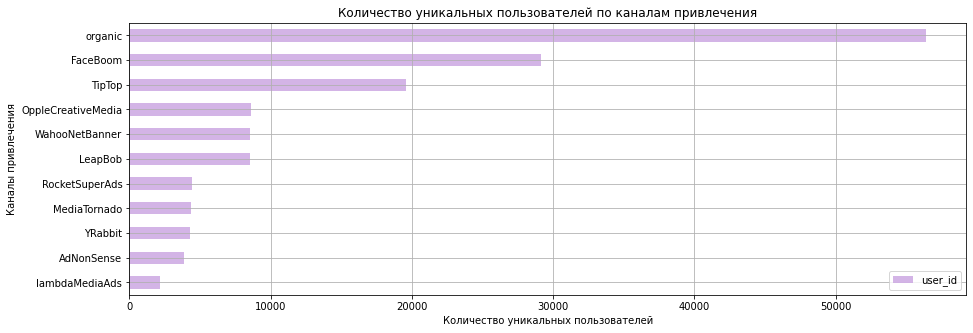

In [48]:
top_channel.sort_values(by= 'user_id').plot(kind = 'barh', 
                 figsize=(15, 5), 
                 color = "#C8A1E0", 
                 alpha = 0.8, 
                 grid = True)
plt.xticks(rotation=0)
plt.title('Количество уникальных пользователей по каналам привлечения')
plt.ylabel('Каналы привлечения')
plt.xlabel('Количество уникальных пользователей')
plt.show()

Рассмотрим эту метрику в процентном соотношении. Органический трафик занимает более 37%. Далее идут каналы FaceBoom и TipTop - 19.4% и 13.0%. Меньше всего было привлечено людей с помощью источника lambdaMediaAds (1.4%). 

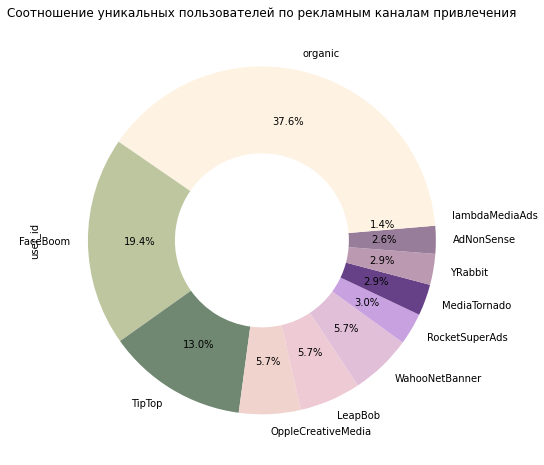

In [49]:
colors = ["#FEF3E2", "#BEC6A0", "#708871", "#F1D3CE", "#EECAD5", "#E2BFD9", "#C8A1E0", "#674188", "#BB9AB1", "#987D9A"]
top_channel.plot(kind='pie', figsize=(8, 8), legend = False, pctdistance=0.70, 
                wedgeprops=dict(width=0.5), startangle=10,
                autopct='%1.1f%%', colors = colors, subplots=True)
plt.title('Соотношение уникальных пользователей по рекламным каналам привлечения')
plt.show()

Построим таблицу, отражающую количество платящих и неплатящих пользователей и рекламные источники привлечения. Сначала создадим сводную таблицу, в которой по устройствам разделим пользователей по факту платежа.

In [50]:
channel_payer = (profiles.pivot_table(index='channel', columns='payer',
                                     values='user_id', aggfunc='count'))

channel_payer = channel_payer.rename(columns={False: 'not_payer', True: 'payer'}).sort_values(by='payer')
channel_payer

payer               not_payer  payer
channel                             
MediaTornado             4208    156
YRabbit                  4147    165
lambdaMediaAds           1924    225
OppleCreativeMedia       8372    233
LeapBob                  8291    262
RocketSuperAds           4096    352
AdNonSense               3440    440
WahooNetBanner           8100    453
organic                 55279   1160
TipTop                  17683   1878
FaceBoom                25587   3557

Чтобы подробнее рассмотреть соотношение пользователей по факту оплаты построим интерактивный столбчатый график с накоплением.

In [51]:
pay_3 = profiles.groupby(by=['channel', 'payer'], as_index=False).agg(count=('user_id', 'count')).sort_values('count', ascending=False)
fig = px.bar(pay_3, x='channel', y='count', color='payer',  height=600,
            color_discrete_map={'False': 'royalblue', 'True': 'darkblue'})
fig.update_layout(
    title_text='Соотношение платящих и неплатящих пользователей по каналам привлечения',
    title_font_size=20,
    xaxis_title='Каналы привлечения',
    yaxis_title='Количество пользователей')
fig.show()

Мы видим, что количество неплатящих пользователей превышает платящих по всем рекламным источники привлечения.

Построим таблицу, отражающую количество пользователей и долю платящих по всем рекламным каналам. 

In [52]:
channel_payer_2 = channel_payer
channel_payer_2['all'] = channel_payer_2['not_payer'] + channel_payer_2['payer']

channel_payer_2['payer_percent'] = (channel_payer_2['payer'] / 
                                ((channel_payer_2['not_payer'] + channel_payer_2['payer']))* 100).round(1)

channel_payer_2 = channel_payer_2.drop(columns=['not_payer'])
channel_payer_2 = channel_payer_2.drop(columns=['payer'])

channel_payer_2.sort_values(by='payer_percent', ascending = False)

payer                 all  payer_percent
channel                                 
FaceBoom            29144           12.2
AdNonSense           3880           11.3
lambdaMediaAds       2149           10.5
TipTop              19561            9.6
RocketSuperAds       4448            7.9
WahooNetBanner       8553            5.3
YRabbit              4312            3.8
MediaTornado         4364            3.6
LeapBob              8553            3.1
OppleCreativeMedia   8605            2.7
organic             56439            2.1

По данной таблице видно, что доля платящих пользователей, перешедших на сейт приложения без участия рекламы, самая маленькая - всего 2.1%. А вот среди всех рекламные каналов привлечения по проценту платящих пользователей лидирует FaceBoom (12.2%). OppleCreativeMedia хуже справился со своей задачей - из 8605 человек перешедших на сайт только 233 или 2.7% совершили покупку.

***Таким образом***, в результате этого шага мы узнали, какие были использованы рекламные источники привлечения и определили каналы, из которых пришло больше всего платящих пользователей:

1) Больше всего пользователей приложения попали на сайт приложения без участия рекламных каналов (37.6%).

2) Рассматривая исключительно рекламные источники привлечения - самым популярным стал FaceBoom (привлек более 29 тыс людей). Также FaceBoom лидирует по числу платящих пользователей - 3557 человек или 12.2%.

3) lambdaMediaAds привлек наименьшее число пользователей, но доля платящих пользователей у него занимет 3 место в топе источников (10.5% пользователей).

4) Органический трафик хоть и занимает первое место по привлечению пользователей, однако доля платящих людей в нем самая маленькая - 2.1%

Дополнительно рассмотрим взаимосвязь стран и рекламных каналов. Возможно, в странах использовали разные рекламные каналы.

In [53]:
region_channel = profiles.pivot_table(index = 'region', 
                                      columns='channel', 
                                      values = 'user_id', 
                                      aggfunc = 'count')
region_channel

channel        AdNonSense  FaceBoom  LeapBob  MediaTornado  \
region                                                       
France             1366.0       NaN   2988.0           NaN   
Germany            1219.0       NaN   2519.0           NaN   
UK                 1295.0       NaN   3046.0           NaN   
United States         NaN   29144.0      NaN        4364.0   

channel        OppleCreativeMedia  RocketSuperAds   TipTop  WahooNetBanner  \
region                                                                       
France                     2991.0             NaN      NaN          2971.0   
Germany                    2562.0             NaN      NaN          2579.0   
UK                         3052.0             NaN      NaN          3003.0   
United States                 NaN          4448.0  19561.0             NaN   

channel        YRabbit  lambdaMediaAds  organic  
region                                           
France             NaN           742.0   6392.0  
Germany            NaN           649.0   5453.0  
UK                 NaN           758.0   6421.0  
United States   4312.0             NaN  38173.0

По таблице видно, что те рекламные каналы, которые используются в США не используются в Европе. Например эксклюзивными для США источниками привлечения пользователей являются FaceBoom, YRabbit, MediaTornado, RocketSuperAds, TipTop. А для Европы - AdNonSense, LeapBob, OppleCreativeMedia, WahooNetBanner, lambdaMediaAds.

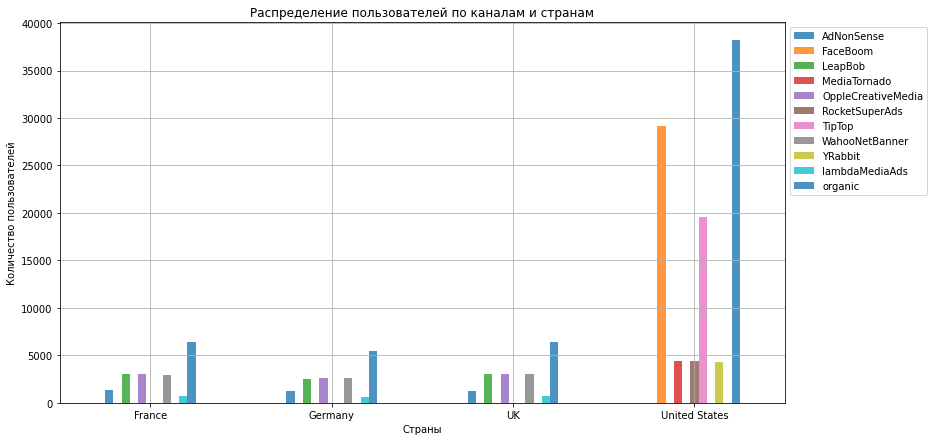

In [54]:
region_channel.plot(kind='bar', figsize=(13,7), alpha = 0.8, grid = True)
plt.xticks(rotation=0)
plt.title('Распределение пользователей по каналам и странам')
plt.ylabel('Количество пользователей')
plt.xlabel('Страны')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

Приток "органических" пользователей превышает остальные значения в каждой из стран, как уже было ранее сразано.

Получается, что у нас в Датафрейме больше всего пользователей из США, которых привлекли через FaceBoom и TipTop.

В ходе проведения исследовательского анализа данных мы:

- составили таблицу профилей пользователей, в которую поместили данные о датах, странах, типах устройств и рекламных каналах привлечения.
- определили минимальную и максимальную даты привлечения пользователей, с которыми будем работать в дальнейшем. Главным условием было, чтобы пользователи успели накопить 14 дней лайфтайма до даты анализа.
- выявили, что из 4 стран (Германия, Великобритания, Франция и США) на США приходится не только большее число пользователей (более 66%), но и большее число тех, кто совершил покупку(6.9%).
- узнали, что большинство пользователей (54479 человек из 150008) предпочитают пользоваться iPhone. В основном, большинство пользователей пользуются мобильными платформами. Однако среди платящих пользователей на первом месте находятся владельцы Mac (6.4%). Заядлыми неплатильщиками являются владельцы ПК (из 30455 человек только 5.0% совершили покупку).
- выяснили, что большая часть пользователей перешла на сайт приложения без влияния рекламных источников (37.6%), но из них совершили покупку полько 2.1%. Среди рекламных каналов лучше всех себя показал FaceBoom. С его помощью не только большая группа людей (19.4%) перешла на сайт приложения, но и совершила покупку (12.2%).
- узнали, что для рынка Европы и США используются разные каналы продвижения приложения.

По итогу мы получили следующий результат:

**Подавляющее большинство всех пользователей из США пользуются iPhonе и были привлечены на сайт приложения через FaceBoom, TipTop или естественным путем**.

## Маркетинг
<a id="title4"></a>

### Расчет общей суммы расходов на маркетинг.

Для расчета суммы всех расходов на рекламу обратимся к таблице costs и воспользуемся методами .sum() и .round(2). 

In [55]:
expenses = costs['costs'].sum().round(2)
expenses

105497.3

Всего на расходы на рекламу было потрачена сумма, равная 105497.3.

### Распределение трат по рекламным источникам.

Теперь посмотрим, как были распределены суммы на рекламные каналы. Сгруппируем суммы стоимостей по каналам привлечения. 

Самые большие суммы вложений были сделаны в каналы TipTop и FaceBoom (54751.30 и 32445.60 соответственно). Мы уже знаем, что TipTop, FaceBoom, YRabbit и MediaTornado - каналы, которые используются в рекламных целях в США. Однако в YRabbit и MediaTornado было вложено меньше всего средств даже по сравнению с Европейскими рекламными источниками (954.48 и 944.22 соответственно).

In [56]:
channel_expenses = costs.pivot_table(index='channel', values='costs', aggfunc='sum')
channel_expenses.sort_values(by='costs', ascending = False).style.background_gradient('PuBuGn')

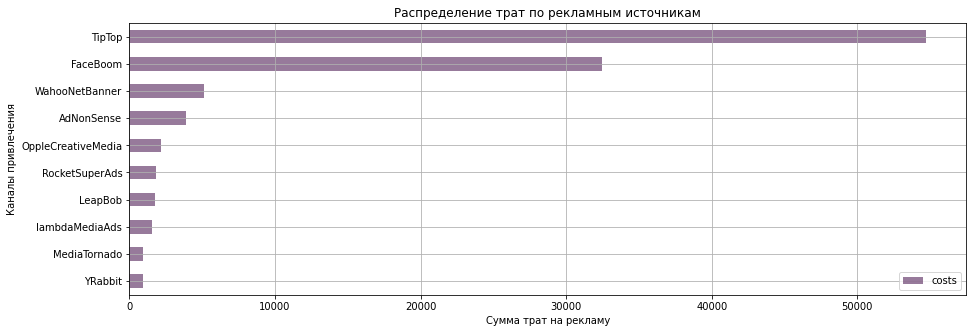

In [57]:
channel_expenses.sort_values(by='costs').plot(kind = 'barh', 
                 figsize=(15, 5), 
                 color = "#522258", 
                 alpha = 0.6, 
                 grid = True)
plt.xticks(rotation=0)
plt.title('Распределение трат по рекламным источникам')
plt.ylabel('Каналы привлечения')
plt.xlabel('Сумма трат на рекламу')
plt.show()

Дополним таблицу информацию о том, какую долю от общих трат на рекламу было выделено на каждый источник. 

In [58]:
channel_expenses['percent'] = ((channel_expenses['costs'] / 
                                (channel_expenses['costs'].sum()))* 100).round(2)

channel_expenses.sort_values(by='costs', ascending = False)

costs  percent
channel                              
TipTop              54751.30    51.90
FaceBoom            32445.60    30.75
WahooNetBanner       5151.00     4.88
AdNonSense           3911.25     3.71
OppleCreativeMedia   2151.25     2.04
RocketSuperAds       1833.00     1.74
LeapBob              1797.60     1.70
lambdaMediaAds       1557.60     1.48
MediaTornado          954.48     0.90
YRabbit               944.22     0.90

Американские источники привлечения получили больше всего средств из бюджета на рекламу. Европейские источники (AdNonSense, LeapBob, OppleCreativeMedia, WahooNetBanner, lambdaMediaAds) получили от 1.48% до 4.88% рекламного бюджета.

***Таким образом***, в результате этого шага мы узнали общую сумма расходов на маркетинг, а также как были распределены траты по рекламным источникам, то есть сколько денег потратили на каждый источник:

1) Всего на рекламу было выделено 105497.0.

2) Самые большие суммы вложений были сделаны в каналы TipTop и FaceBoom (54751.30 и 32445.60 соответственно). Мы уже знаем, что TipTop, FaceBoom, YRabbit и MediaTornado - каналы, которые используются в рекламных целях в США. Однако в YRabbit и MediaTornado было вложено меньше всего средств даже по сравнению с Европейскими рекламными источниками (954.48 и 944.22 соответственно).

3) MediaTornadо и YRabbit получили менее 1% бюджета на рекламу каждый, в то время как на такие же американские источники привлечения TipTop и FaceBoom было выделено в общей сумме 82.65% от всего бюджета!.

### График динамики изменения расходов во времени по неделям по каждому источнику. График динамики изменения расходов во времени по месяцам по каждому источнику.

Построим динамичный предварительный график по датам, чтоб посмотреть изменения расходов. На нем мы сможем выделять необходимые источники, чтобы сравнивать их между собой. Уже видна разница в динамике финансирования таких источников, как FaceBoom и TipTop. На них изначально уходили суммы от 80 до 100 в день.

Если мы будем отдельно рассматривать каждый рекламный канал, то заметим, что каналы разделились на тех, чьи рекламные затраты выросли, и те, чьи упали.

- lambdaMediaAds, AdNonSense, YRabbit, RocketSuperAds, MediaTornado - начиная с июня бюджет был снижен практически в двое.
- WahooNetBanner, OppleCreativeMedia, LeapBob - начиная с июня бюджет вырос в 2-3 раза.
- FaceBoom - в конце сентября бюджет превышал начальный в 6 раз!
- TipTop - в конце сентября бюджет превышал начальный в 8 раз!

In [59]:
fig = px.line(costs, x="dt", y="costs", color='channel', markers=True)
fig.update_layout(
    title_text='Динамика рекламных расходов на каналы привлечения',
    title_font_size=20,
    xaxis_title='Даты',
    yaxis_title='Суммы расходов')
fig.show()

Для того, чтобы построить график рекламных расходов по месяцам сначала создадим столбы, в который поместим дату из столбца dt и выделим номер месяца методом .dt.month, а также методом .dt.isocalendar().week создадим номер недели

In [60]:
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Отметим манкерами недели.

Очень сильно выдаляются две линии - TipTop и FaceBoom. На первый взгляд динамика ясна: именно на эти два источника в течении времени постепенно увеличивали траты из бюджета. Первый пик у обоих источников наблюдается на 22й неделе, затем на 26й. На 29й неделе у обоих идет снижение финансирования, а затем с 31й по 37ю недели наблдаются еженедельные выплаты примерно в одну и ту же сумму. На 39й неделе у обоих источников снова начинается финансирование еще большими суммами.

Максимальные недельные отчисления на TipTop составляют около 4000, а на FaceBoom - около 1800.

In [61]:
week = costs.groupby(by=['week', 'channel'], as_index=False).agg(sum=('costs', 'sum'))
fig = px.line(week, x='week', y='sum', color='channel', markers=True)
fig.update_layout(
    title_text='Динамика понедельного изменения расходов на рекламу по источникам привлечения пользователей',
    title_font_size=20,
    xaxis_title='Номер недели',
    yaxis_title='Суммы расходов')
fig.show()

Все остальные источники на первый взгляд получают примерно одну и ту же сумму на рекламу. Снимем отметки TipTop и FaceBoom чтобы внимательнее рассмотреть остальные источники.

Уже не так гладко. Со временем AdNonSense явно перестал интересовать отдел маркетинга и затраты на этот канал резко снизились на 21й неделе. Примерно в это же самое время WahooNetBanner наоборот привлек внимание и затраты на него начинают расти.

На наших любимых YRabbit и MediaTornado (которые в общем-то и не привлекали пользователей), с самого начала никто не ставил ставки.

Построим график динамики изменения расходов по месяцам по каждому источнику. 

Максимальная сумма расходов зарегистрирована в сентябре у FaceBoom - 132325.

Если же мы уберем с графика наших двух лидеров, то видно, как выравниваются суммы, которые были потрачены на остальные каналы каждый месяц, начиная с июня. На графике не отображаются такие резкие скачки как при рассмотрении ежедневных или ежемесячных вложений в рекламу.

Строго говоря, рассматривая через призму ежемесячных расходов, то суммы многих источников оставались примерно на одном и том же уровне.

In [62]:
month = costs.groupby(by=['month', 'channel'], as_index=False).agg(sum=('costs', 'sum'))
fig = px.line(month, x='month', y='sum', color='channel', markers=True)
fig.update_layout(
    title_text='Динамика ежемесячного изменения расходов на рекламу по источникам привлечения пользователей',
    title_font_size=20,
    xaxis_title='Номер месяца',
    yaxis_title='Количество пользователей')
fig.show()

Также важно отметить, что в период с мая по июнь маркетинговый отдел получил отчет о воздействии разных рекламных источников на пользователей и выделил для себя определенные стратегии по вложению средств в них.

Так, например, AdNonSense, RocketSuperAds, lambdaMediaAds, MediaTornado и YRabbit после 1 месяца привлечения пользователей потеряли доверие финансистов и было принято решение снизить вложение в них. А WahooNetBanner, OppleCreativeMedia и LeapBob наоборот получили дополнительные средства на развитие рекламы.

***Таким образом***, в результате этого шага построили графики с недельной и ежемесячной визуализацией динамики изменения расходов на рекламу по каждому источнику:

1) FaceBoom и TipTop оказались не только самыми популярными каналами привлечения пользователей, но и затраты на них росли практически на протяжении всех измерений.

2) У остальных каналов на протяжении всех месяцев практически не менялся бюджет, но при более детальном рассмотрении суммы ежедневных и еженедельных расходов заметно колебались.

3) MediaTornadо и YRabbit в первый месяц получали суммы вложений выше, чем у OppleCreativeMedia и LeapBob, но тем не менее не справились со своей целю. Их бюджет упал в июне и с тех пор был самым маленьким на протяжении всего оставшегося времени.

4) На 24й, 29й и 36й неделях расходы практически на все источники привлечения были снижены, в то время как 22я, 26я и 39я недели оказались самыми затратными.

### Средняя стоимость привлечения одного пользователя (CAC) из каждого источника. 

Выясним, какая средняя стоимость привлечения для каждого источника. Самый затратный рекламный источник для приложения - TipTop (САС составляет 2,8). Самый бюджетный - LeapBob (САС равен 0.21).

In [63]:
cac = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
cac.sort_values(by='acquisition_cost', ascending = False).style.background_gradient('PuBuGn')

А теперь посмотрим, как со временем менялась стоимость привлечения одного пользователя.

Получилась какая-то лестница. Через канал TipTop средняя стоимость в мае составляла 0.97, затем каждый месяц как по ступенькам росла, пока не достигла 3.5. Выходит, что привлечение пользователей со временем через TipTop становилось все дороже и дороже для приложения. У других каналов такого не наблюдалось.

Наиболее стабильные источники, у которых на протяжении всего времени не происходило изменений в стоимости привлечения: FaceBoom, WahooNetBanner, OppleCreativeMedia, LeapBob и WahooNetBanner.

САС таких источников, как AdNonSense, RocketSuperAds, MediaTornado и YRabbit, изменялось в пределах 0.5.

RocketSuperAds вообще единственный, у кого САС снижался на протяжении всего времени (с 0.54 до 0.28). 

In [64]:
cac_in_time = profiles.groupby(by=['dt', 'channel'], as_index=False).agg(mean=('acquisition_cost', 'mean'))
fig = px.line(cac_in_time, x='dt', y='mean', color='channel', markers=True)
fig.update_layout(
    title_text='Динамика САС по каналам привлечения',
    title_font_size=20,
    xaxis_title='Дата привлечения',
    yaxis_title='CAC')
fig.show()

Если же мы посмотрим на общий САС всех источников, то он получится 1.13

In [65]:
# organic не входит в число рекламных каналов, поэтому нам нужно посчитать среднее САС всех строк, 
# кроме тех в которых содержится organic
profiles_2 = profiles.query('channel != "organic"')
profiles_2['acquisition_cost'].mean().round(2)

1.13

В ходе проведения маркетингового исследования, мы:

- посчитали общую сумму расходов на маркетинг - 105497.3.
- выяснили, как траты распределены по рекламным источникам: Самые большие суммы вложений были сделаны в каналы TipTop и FaceBoom (54751.30 и 32445.60 соответственно). Меньше всего средств даже по сравнению с Европейскими рекламными источниками было вложено в YRabbit и MediaTornado (954.48 и 944.22 соответственно). Европейские источники (AdNonSense, LeapBob, OppleCreativeMedia, WahooNetBanner, lambdaMediaAds) получили от 1.48% до 4.88% рекламного бюджета.
- построили графики с визуализацией динамики изменения расходов во времени по неделям по каждому источнику, а затем на другом графике визуализировали динамику изменения расходов во времени по месяцам по каждому источнику: Затраты на FaceBoom и TipTop росли практически на протяжении всего времени. Большинство изменений в финансировании рекламных источников произошел после июня, когда появились первые результаты по привлечению пользователей.
- узнали, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника:

Общий САС всех источников составил 1.13. Самый затратный рекламный источник для приложения - TipTop (САС составляет 2,8). Самый бюджетный - LeapBob (САС равен 0.21). Только TipTop наблюдалось ступенчатое повышение САС каждый месяц. Единственный источник, который наоборот стал дешевле RocketSuperAds.


По итогу мы получили следующий результат:

**Привлечение на сайт приложения через TipTop и FaceBoom обходится компании дороже всех остальных рекламных источников при условии того, что САС FaceBoom не меняется со временем, а средняя стоимость привлечения пользователей TipTop неприлично растет**.

## Оценка окупаемости рекламы
<a id="title5"></a>

### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Построим предварительные общие графики, чтобы ознакомиться с ситуацией. Все нужные для этого функции были созданы ранее. Поскольку нам нужно оценить окупаемость рекламы, то пользователей, которые перешли на сайт естественным путем, мы включать в это исследование мы не будем.

In [66]:
profiles = profiles.query('channel != "organic"')

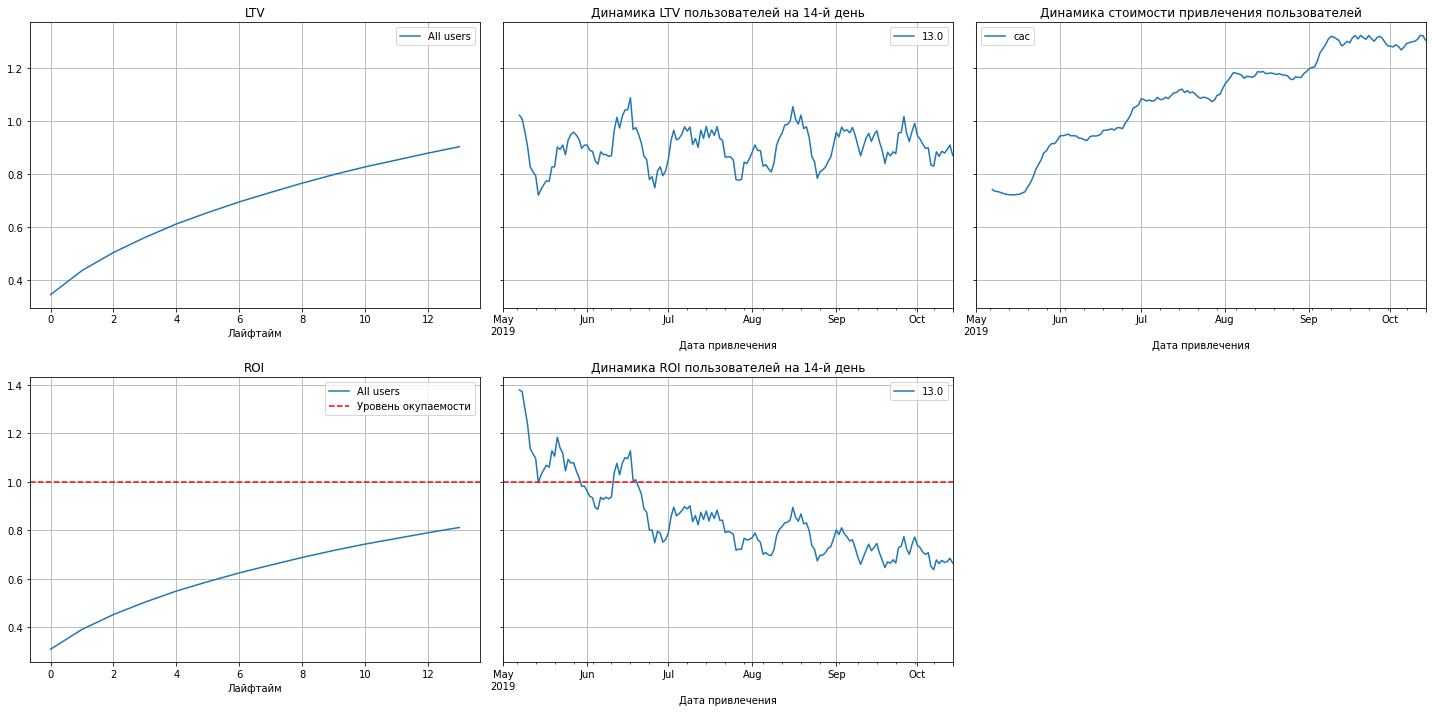

In [67]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Судя по графикам можно сказать, что:

1. LTV рассчитан верно. Кривая LTV плавно растёт, но не пересекает единицы. 
2. Динамика подвержена сезонности по месяцам.
3. CAC — постоянная величина для всех лайфтаймов, у нас же он летит в стратосферу. Разберемся с этим далее. Рекламный бюджет на привлечение пользователей очень вырос.
4. ROI рассчитан верно. Кривая ROI плавно растёт, но не пересекает единицы. Это свидетельствует о том, что затраты на привлечение не окупились — ROI у нас меньше 100%.
5. Динамика ROI в течении всего мая держится выше 1, затем начинает снижаться. В середине июня был проблеск надежды на "окупаемость" пользователей, но затем ROI снов становится меньше 1 и уже больше не поднимается.

Начнем выяснять причины такого явления. Рассмотрим каждую метрику по некоторым характеристикам пользователей — стране, источнику и типу устройства. А также рассмотри конверсию и удержание пользователей.

### Конверсия и удержания пользователей. Графики.

#### Проверка конверсии пользователей и динамики её изменения. График конверсии.

Сначала рассмотрим тепловую карту и кривую конверсии всех пользователей без разбивки по характеристикам.

Общая конверсия растёт: от 5.86% в первый день «жизни» пользователей до 8.01% на 13 день.

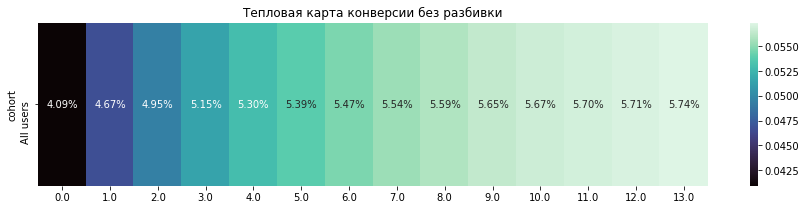

In [68]:
plt.figure(figsize=(15, 3))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%', cmap="mako")
plt.title('Тепловая карта конверсии без разбивки')
plt.show() 

В динамике конверсия меняется во месяцам, но в общем-то стабильна. Снижение конверсии пользователей заметно в середине мая и конце всех летних месяцев.

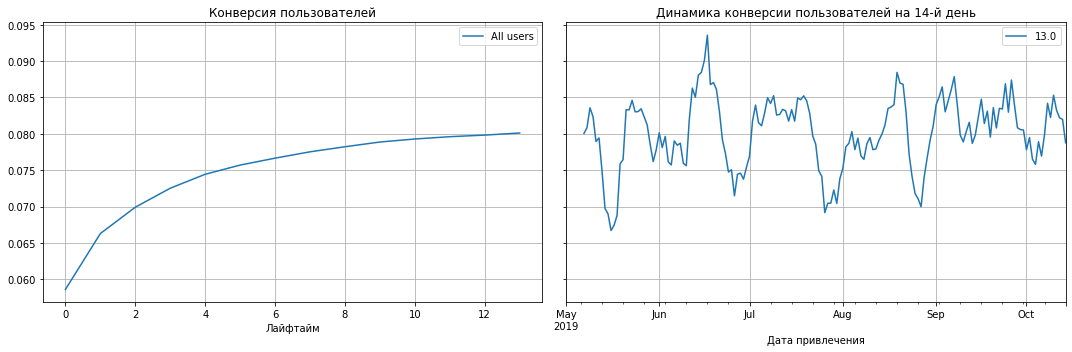

In [69]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Рассчитаем конверсию с разбивкой по стране, источнику и типу устройства.

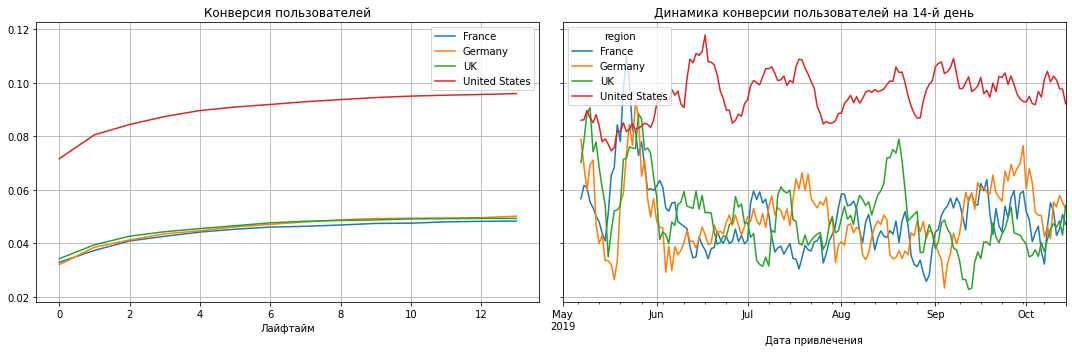

In [70]:
# указываем в параметр dimensions страны
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия американских пользователей, расположена выше немецкой, французской и британской линий. В целом, конверсия пользователей из всех стран постепенно растёт на протяжении всех дней.

График истории изменений показывает нам, что конверсия пользователей из США более стабильная, по сравнению с Германией, Великобританией и Францией. У всех европейских стран заметно резкое падение и затем скачок конверсии в мае (особенно во франции). В августе конверсия в Великобритании была максимальной за все лето, в Германии - в Сентябре.

Теперь рассмотрим разбивку по типу устройств. 

Конверсия пользователей Mac расположена выше остальных. В целом, конверсия пользователей по типу устройств постепенно растёт на протяжении всех дней.

График истории изменений показывает нам, что конверсия пользователей, владеющих ПК сильно снижается в июле, в то время как у остальных растет. Владельцы iPhone и Mac вообще способствовали росту конверсии.

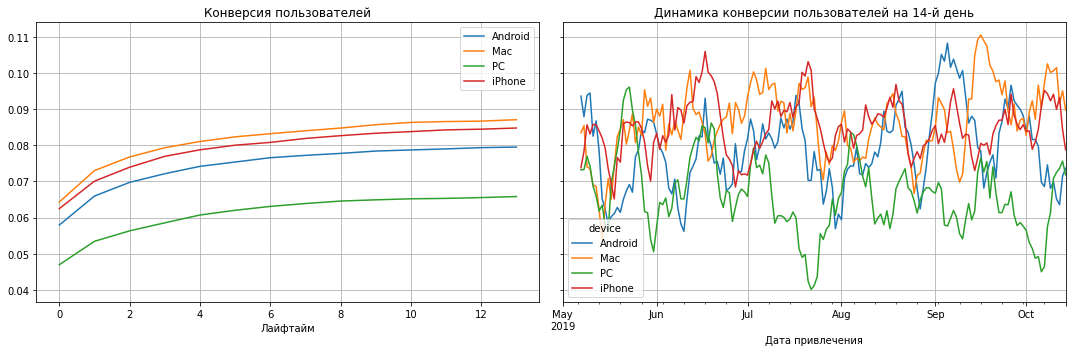

In [71]:
# указываем в параметр dimensions тип устройства 
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Рассмотрим разбивку по источнику. 

Конверсия пользователей перешедших через FaceBoom расположена выше остальных. В целом, конверсия пользователей по источнику постепенно растёт на протяжении всех дней.

График истории изменений показывает нам, что конверсия lambdaMediaAds в июне была максимальной среди всех источников! А конверсия YRabbit и MediaTornado являются самой низкой.

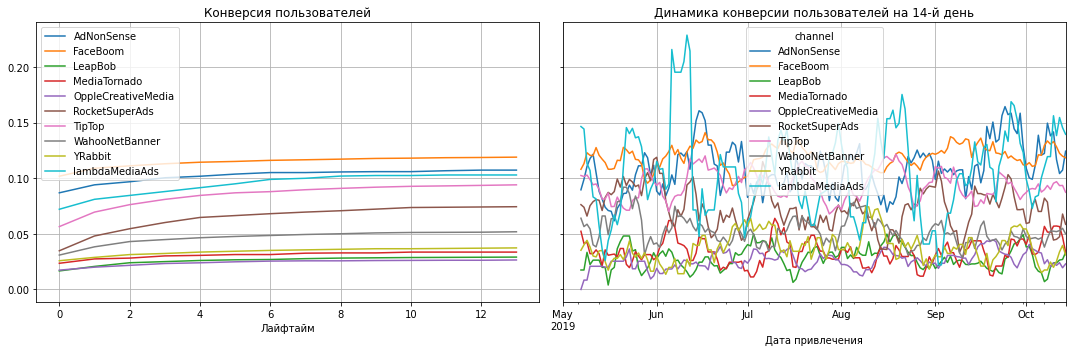

In [72]:
# указываем в параметр dimensions источник 
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

#### Проверка удержания пользователей и динамики её изменения. График удержания.

Сначала рассмотрим кривые удержания всех пользователей по факту платежа и стране.

Общее удержание платящих пользователей выше, чем у неплатящих.

Рассматривая платящих пользователей можно сделать вывод, что удержание пользователей из США хуже пользователеей из Европы. Также на графике динамики видно, что информации о некоторых датах нет. Но это не касается линии США, она цельная и на ней заметны куда меньше колебания по датам.

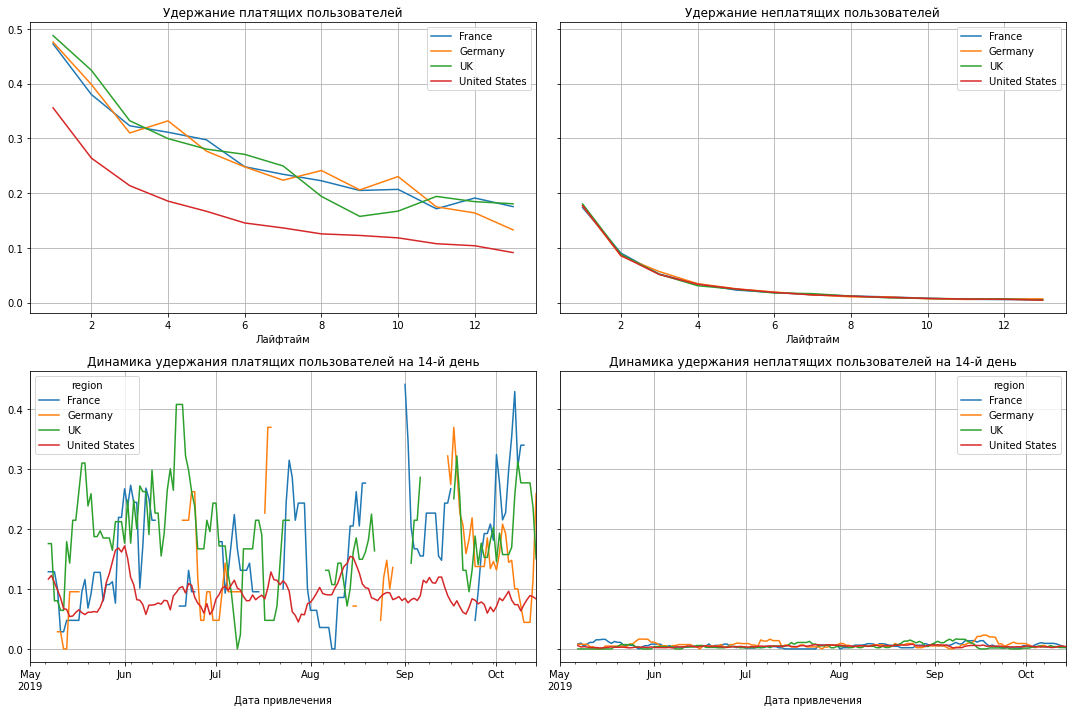

In [73]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Платящие пользователи, пользующиеся iPhone имеют более плавное снижение удержания. Пользователи ПК и Android имеют специфические изломы (с 3 по 7 лайфтайм особенно). 

Также динамика удержания пользователей с iPhone хоть и ниже остальных, но более стабильна.

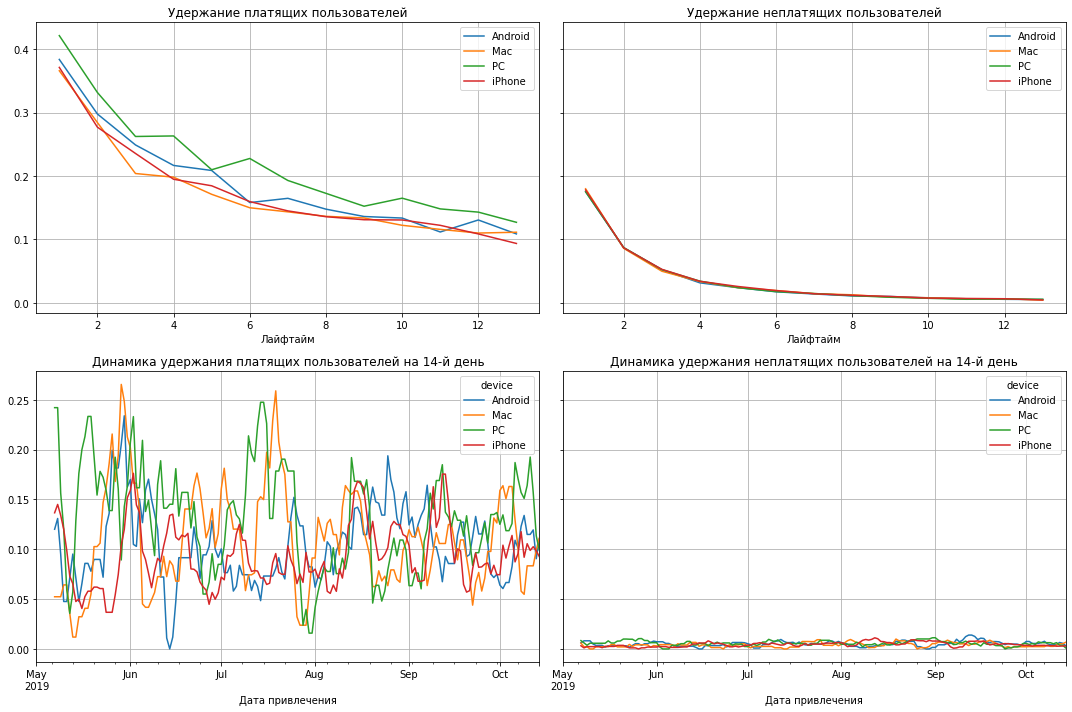

In [74]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи, перешедшие через AdNonSense и FaceBoom имеют самый низкий процент удержания, но плавное снижение. Пользователи, перешедшие по другим каналам имеют процент удержания выше, но кривые изломаны. 

Также динамика удержания пользователей FaceBoom хоть и ниже остальных, но более стабильна и не имеет разрывов.

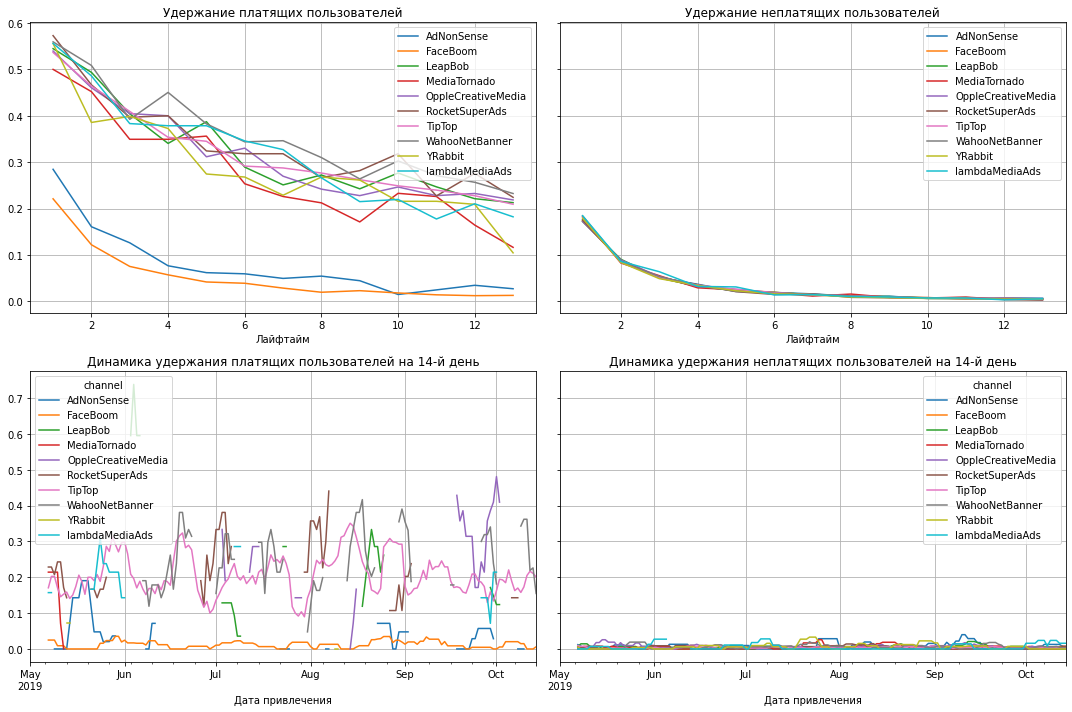

In [75]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

### Окупаемость рекламы с разбивкой по устройствам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Сначала рассмотрим тепловую карту и кривую LTV, CAC и ROI всех пользователей без разбивки по характеристикам.

Общий LTV растёт: LTV пользователей, зарегистрировавшихся в начале мая, составил 68.

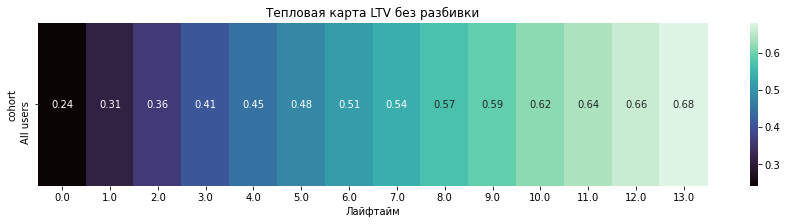

In [76]:
plt.figure(figsize=(15, 3))
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f', cmap="mako")
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

Рассчитаем LTV с разбивкой по типу устройства.

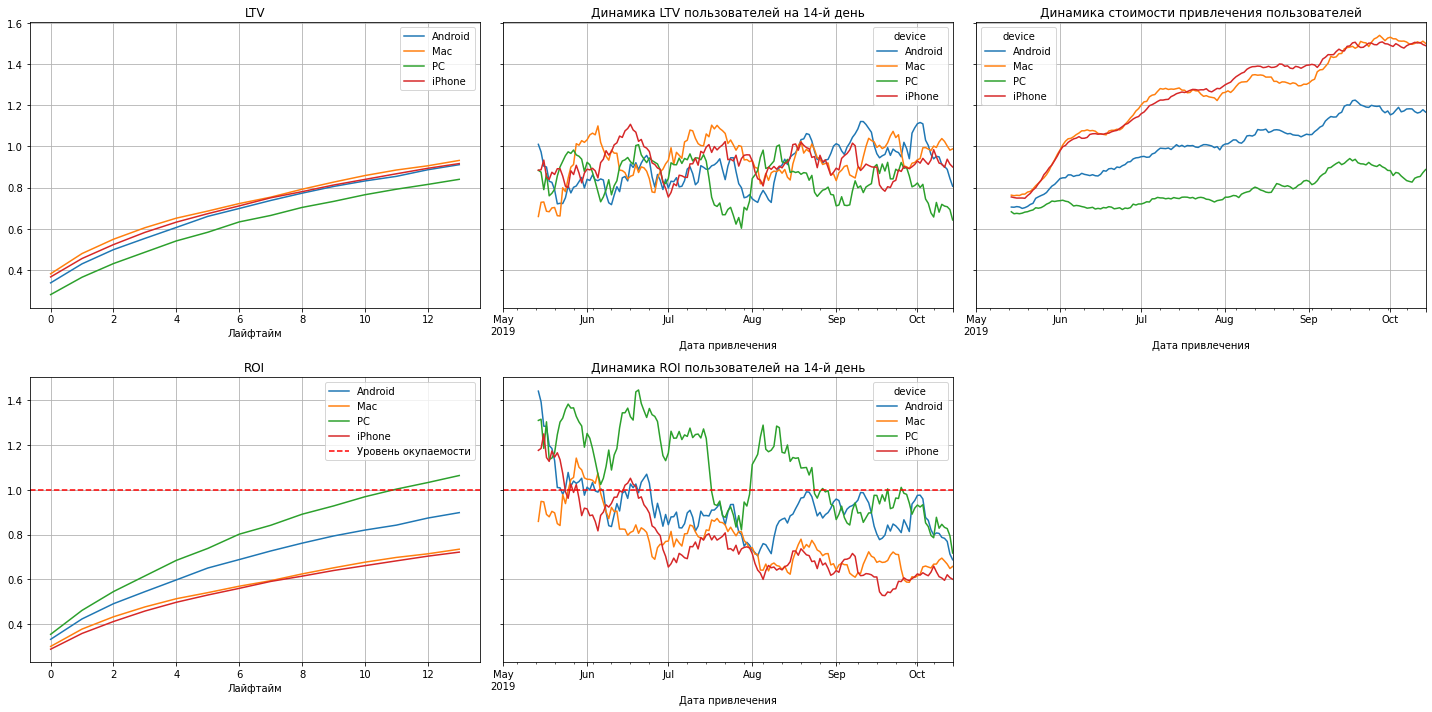

In [77]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Пользователи ПК имеют самый низкий LTV, он выделяется из всех типов устройств. 

Пользователи ПК единственные, чья реклама окупается при том, что САС всех устройств растет. Однако в сентябре и в конце июля были случаи, когда реклама для ПК была убыточной.

Больше всего показатель САС у устройств производства фирмы Apple. И у них же хуже всего профент окупаемости рекламы.

### Окупаемость рекламы с разбивкой по странам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Показатели LTV, CAC и ROI США заметно выделяются среди всех стран.

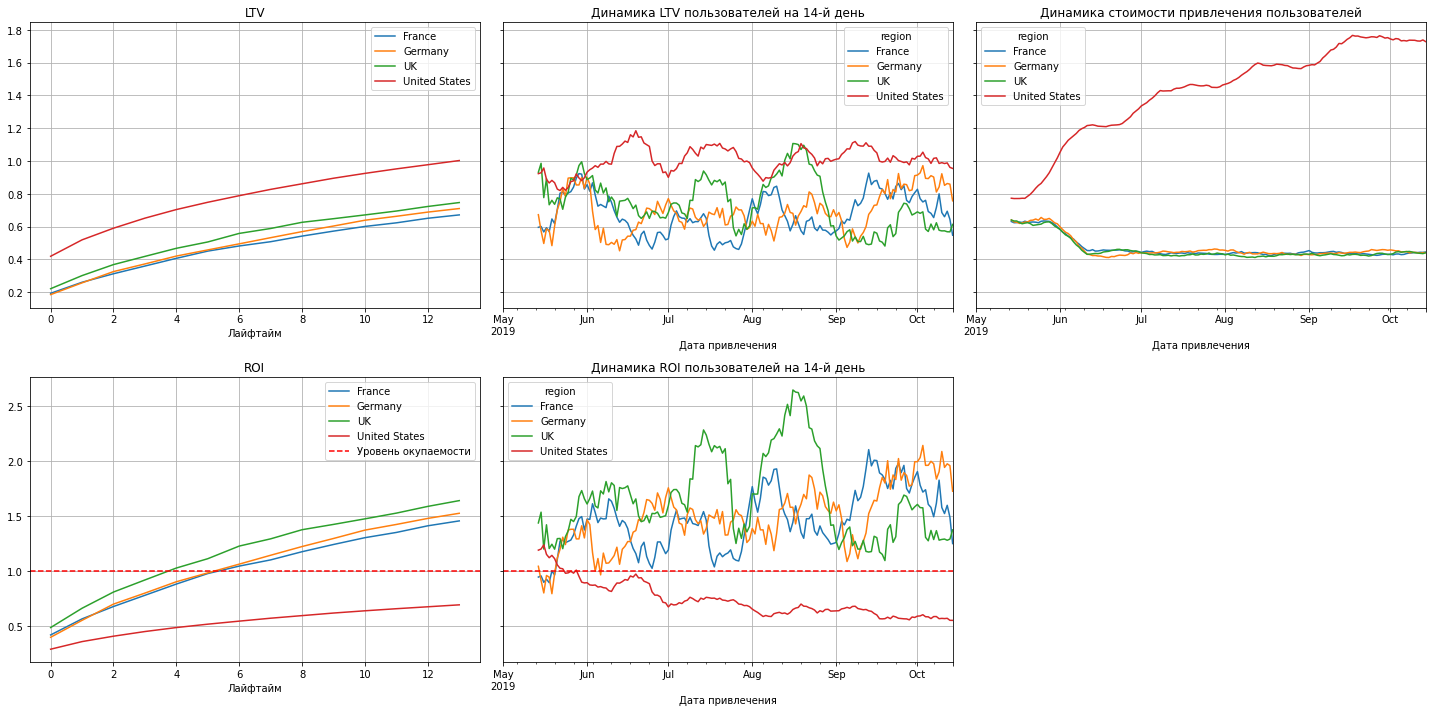

In [78]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Затраты на рекламу окупаются только в европейских странах. В США с этим очень плохо - со временем окупаемость падает, в то время как в других странах растет.

Стоимость привлечения также стабильна и одинакова для всех стран, кроме США. Там этот показатель не только не изменяется, но растет.

LTV всё так же подвержен сезонности, но стабилен.

### Окупаемость рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


Показатели LTV, CAC и ROI некоторых каналов заметно выделяются среди всех остальных.

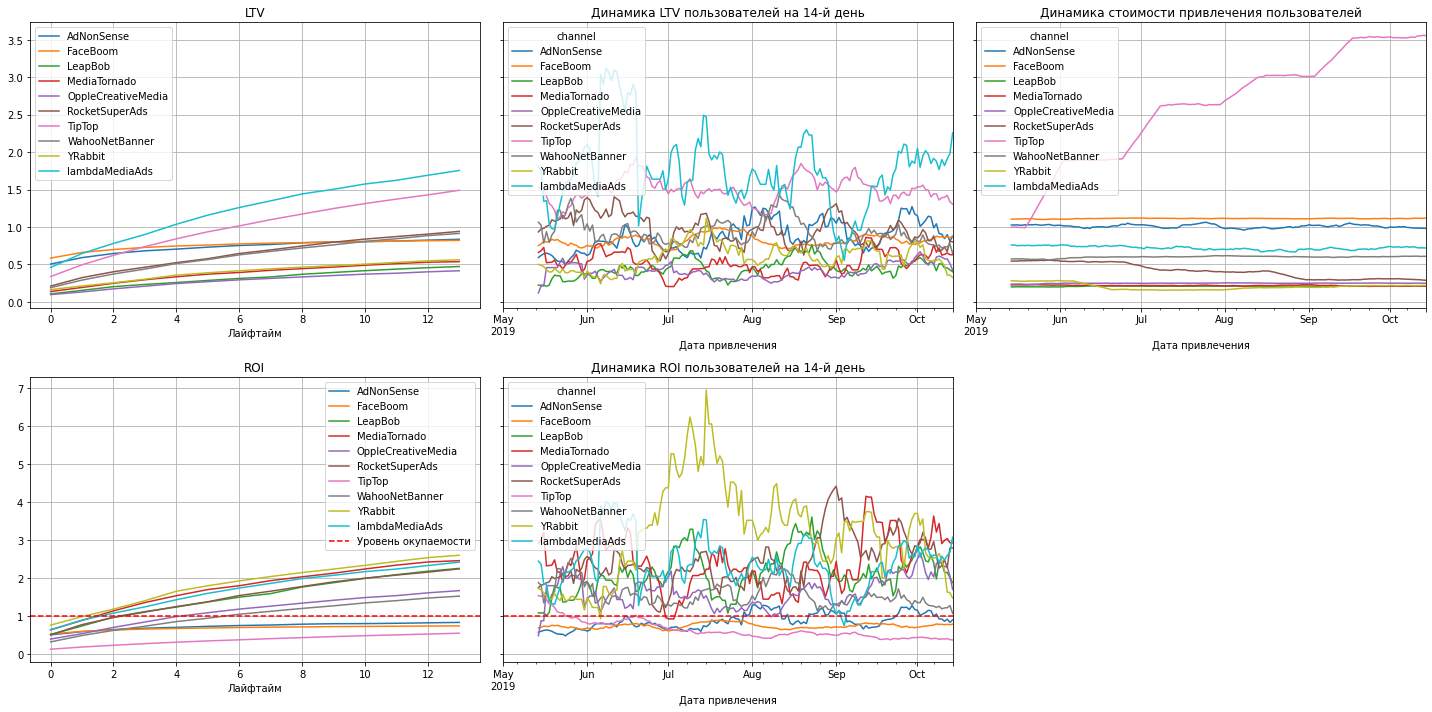

In [79]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Мы снова видим уже знакомую для нас лесенку - снова подтвердилось, что самый затратный рекламный источник для приложения - TipTop (у него САС составляет 2,8). Привлечение пользователей со временем через него становилось все дороже и дороже для приложения. У других каналов такого не наблюдалось.

LTV каналов подвержен сезонности.

На окупаемость AdNonSense, FaceBoom и TipTop вообще смотреть страшно. На них уходит почти весь бюджет, а они вот так вот поступают. 

Также интересен тот факт, что канал YRabbit, в который было вложено почти ничего и который привлек почти нисколько людей очень замечательно окупился в июле.

По итогу анализа данных параметров можно ответить на ряд вопросов:
- Окупается ли реклама, направленная на привлечение пользователей в целом?

**ROI у нас не достигает 100% и находится где-то на уровне 80%. Это свидетельствует о том, что затраты на рекламу превышают доходы приложения**.
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

**Поскольку у нас подавляющее большинство всех пользователей из США пользуются iPhone и были привлечены на сайт приложения через дорогостоящие TipTop и FaceBoom, то именно они и оказывают негативное влияние на окупаемость рекламы. И это все при условии того, что САС FaceBoom не меняется со временем, а средняя стоимость привлечения пользователей TipTop постоянно растет**.

## Выводы
<a id="title6"></a>

***Объектом*** исследования были данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

***Целью*** исследования был анализ бизнес-показателей по поиску причин убытков. 

В ***ходе*** исследования мы:
- рассчитали такие бизнес-показатели, как «пожизненная ценность» клиента (LTV), окупаемость инвестиций (ROI),стоимость привлечения одного клиента (CAC), удержание (Retention Rate) и конверсия (CR),
- провели анализ данных,
- выявили причины неэффективности привлечения пользователей,
- сформулировали рекомендации для отдела маркетинга.

***Этапы*** исследования:

1. Загрузка данных и подготовка их к анализу 

- Выгрузили необходимые библиотеки данных по работе с данными, их визуализацией (pandas, matplotlib.pyplot, seaborn, plotly.express).
- Изучили общую информацию в исходных таблицах (методом .info()).
- Проверили и изменили тип данных (методом to_datetime()). 
- Проверили наличие пропущенных значений (методами .isna().sum()).
- Проверили наличие продублированных строк (методами .duplicated().sum() и .unique()).
- Переименовали столбцы, чтобы привести названия к единому виду и в «змеиный регистр» (методом .rename()).
2. Создание функции для расчёта и анализа LTV, ROI, удержания и конверсии

На основе уже обработанных данных создали функции для:
- создания профилей пользователей.
- рассчета коэффициента удержания (Retention Rate), подсчёта конверсии (CR), LTV (Lifetime Value), сглаживания данных.
- построения графика Retention Rate,  конверсии, LTV и ROI.
3. Исследовательский анализ данных 

Составили таблицу профилей пользователей.
- Определили минимальную и максимальную даты привлечения пользователей (01.05.2019 и 14.10.2019).
- Выявили, что на США приходится не только большее число пользователей и большее число тех, кто совершил покупку.
- Узнали, что большинство пользователей предпочитают пользоваться iPhone. Среди платящих пользователей на первом месте находятся владельцы Mac.
- Выяснили, что большая часть пользователей перешла на сайт приложения без влияния рекламных источников или с помощью FaceBoom.
- Узнали, что для рынка Европы и США используются разные каналы продвижения приложения.
4. Маркетинг

- посчитали общую сумму расходов на рекламу - 105497.3.
- выяснили, что самые большие суммы вложений были сделаны в каналы TipTop и FaceBoom. Европейские источники получали менее 5% рекламного бюджета.
- узнали, что большинство изменений в финансировании рекламных источников произошел после июня, когда появились первые результаты по привлечению пользователей.
- узнали, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника: 1.13. 

5. Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализировали окупаемость рекламы. 

1) LTV плавно растёт, но не пересекает единицы.

2) Динамика подвержена сезонности по месяцам.

3) Затраты на рекламу (САС) для привлечения пользователей  выросли.

4) ROI не пересекает границу окупаемости - затраты на привлечение превысили доходы.

5) Конверсия плативших пользователей выше конверсии неплативших.

6) Удержание пользователей плативших пользователей выше конверсии неплативших.

- Выяснили, что для разных стран характерно следующее:

У пользователей из США конверсия больше, однако удержание хуже. Затраты на рекламу окупаются только в европейских странах. Стоимость привлечения в США со временем растет.

- Выяснили, что для разных устройств характерно следующее:

Владельцы iPhone и Mac имеют высокую конверсию и низкое удержание. Пользователи ПК имеют самый низкий LTV, реклама у таких пользователей окупается при том, что САС всех устройств растет.

- Выяснили, что для разных рекламных каналов характерно следующее:

Конверсия пользователей, перешедших через FaceBoom, выше остальных. Пользователи, перешедшие через AdNonSense и FaceBoom имеют самый низкий процент удержания. Самые затратные рекламные источники для приложения - TipTop и FaceBoom.

6. Рекомендации для отдела маркетинга:

**Возможно, во второй половине 2019 года реклама все таки окупилась, но таких данных у нас нет. Если же принимать во внимание только данный отрезок времени, то необходимо рассмотреть альтернативные рекламные источники для США, либо перестроиться на европейский рынок. Также можно было бы улучшить удержание пользователей техники Apple, потому что с конверсией у них все в порядке. Возможно, снизить стоимость подписки или добавить новый функционал в приложение.**